In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
data.head(8)

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
5  Super built-up  Area  Ready To Move                Whitefield      2 BHK   
6  Super built-up  Area         18-May          Old Airport Road      4 BHK   
7  Super built-up  Area  Ready To Move              Rajaji Nagar      4 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
5  DuenaTa       1170   2.0      1.0   38.00  
6  Jaades        2732   4.0      NaN  204.00  
7  Brway G       3300   4.0      NaN  600.00

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
data.shape

(13320, 9)

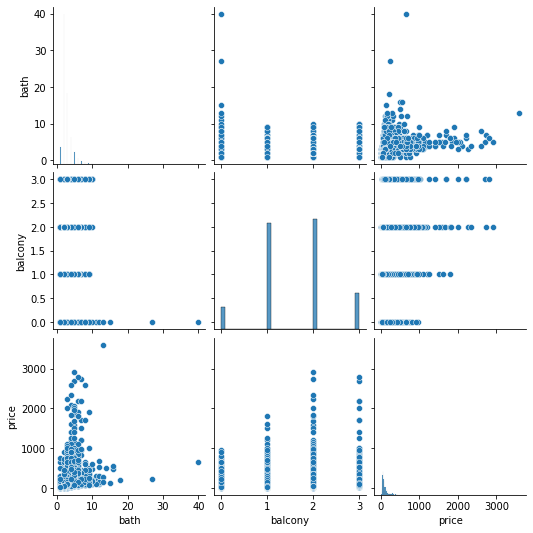

In [7]:
sns.pairplot(data)

In [8]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK        

In [9]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<AxesSubplot:>

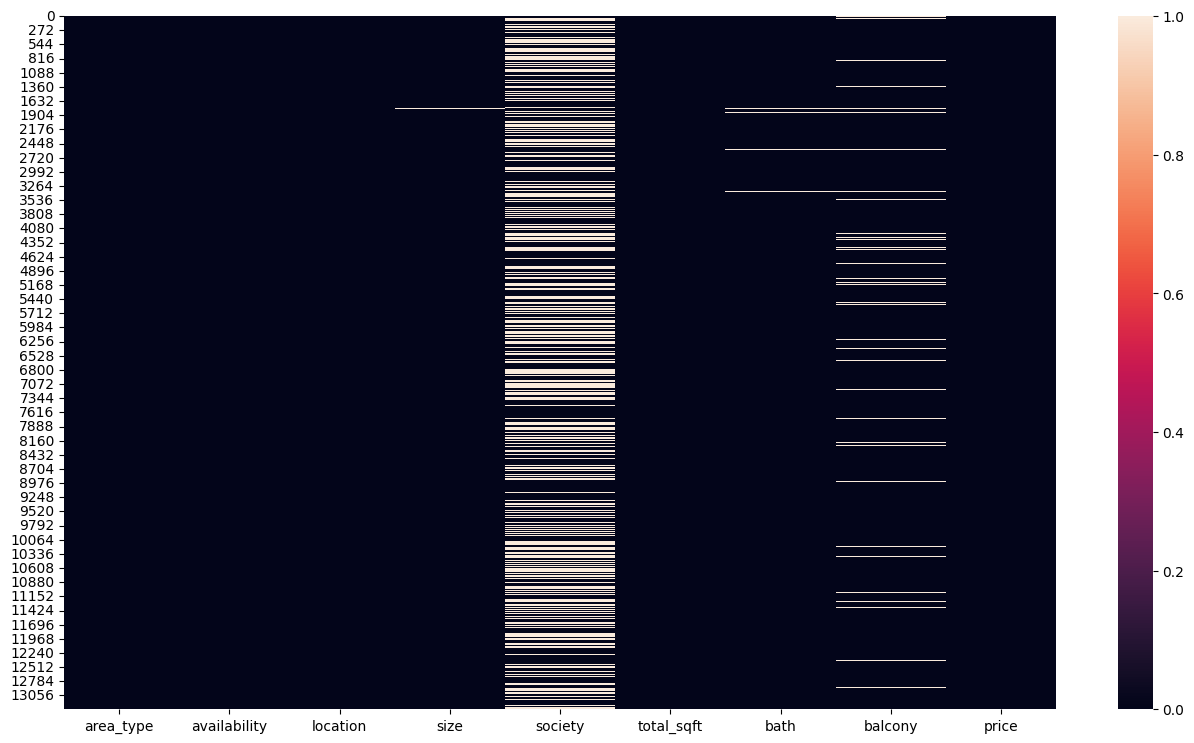

In [10]:
# Visualizing missing value using heatmap to get idea where is the missing value

plt.figure(figsize=(16,9))
sns.heatmap(data.isnull())

Dropping unnecessary columns

In [11]:
data.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [12]:
data

location       size total_sqft  bath   price
0      Electronic City Phase II      2 BHK       1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                      Kothanur      2 BHK       1200   2.0   51.00
...                         ...        ...        ...   ...     ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00
13316             Richards Town      4 BHK       3600   5.0  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00
13319              Doddathoguru      1 BHK        550   1.0   17.00

[13320 rows x 5 columns]

In [13]:
# to show all columns and rows

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [14]:
data.describe()

bath         price
count  13247.000000  13320.000000
mean       2.692610    112.565627
std        1.341458    148.971674
min        1.000000      8.000000
25%        2.000000     50.000000
50%        2.000000     72.000000
75%        3.000000    120.000000
max       40.000000   3600.000000

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [16]:
data['location'].value_counts()

Whitefield                                            540
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

In [17]:
data['location'] = data['location'].fillna('Sarjapur  Road')

In [18]:
data['location'].value_counts()

Whitefield                                            540
Sarjapur  Road                                        400
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

In [19]:
data.isna().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [20]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [21]:
data['size'] = data['size'].fillna('2 BHK')

In [22]:
data['size'] = data['size'].fillna(data['bath'].median())

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [24]:
data['size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: size
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


In [25]:
data.isna().sum()

location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [26]:
data['bath'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: bath
Non-Null Count  Dtype  
--------------  -----  
13247 non-null  float64
dtypes: float64(1)
memory usage: 104.2 KB


In [27]:
data['bath'].isna().sum()

73

In [28]:
data['bath'] = data['bath'].fillna(data['bath'].median())

In [29]:
data['bath'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: bath
Non-Null Count  Dtype  
--------------  -----  
13320 non-null  float64
dtypes: float64(1)
memory usage: 104.2 KB


In [30]:
data['bath'].isna().sum()

0

<AxesSubplot:xlabel='bath'>

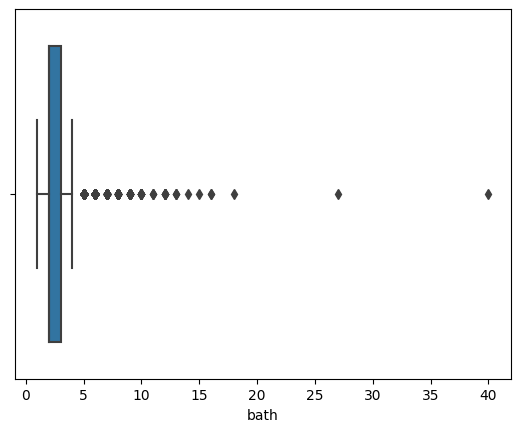

In [31]:
sns.boxplot(data['bath'])

In [32]:
data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [34]:
data.describe()

bath         price
count  13320.000000  13320.000000
mean       2.688814    112.565627
std        1.338754    148.971674
min        1.000000      8.000000
25%        2.000000     50.000000
50%        2.000000     72.000000
75%        3.000000    120.000000
max       40.000000   3600.000000

In [35]:
#new column 'bhk' 

data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [36]:
data[data.bhk > 20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [37]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
#converts range of 'total_sqrt' into float number by divinding!
 
def convertRange(x):
    
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [39]:
data['total_sqft']=data['total_sqft'].apply(convertRange)

In [40]:
data.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

# Price per square feet

In [41]:
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']

In [42]:
data['price_per_sqft']

0        3.699811e+03
1        4.615385e+03
2        4.305556e+03
3        6.245891e+03
4        4.250000e+03
5        3.247863e+03
6        7.467057e+03
7        1.818182e+04
8        4.828244e+03
9        3.627451e+04
10       3.888889e+03
11       1.059246e+04
12       3.800000e+03
13       3.636364e+03
14       6.577778e+03
15       6.255319e+03
16       4.067797e+03
17       3.896104e+03
18       1.046931e+04
19       4.363636e+03
20       2.500000e+03
21       6.951567e+03
22       1.357143e+04
23       5.829089e+03
24       4.950980e+03
25       4.480000e+03
26       3.500000e+03
27       5.031056e+03
28       4.237185e+03
29       4.585366e+03
30       7.515152e+03
31       3.255814e+03
32       6.988636e+03
33       3.389841e+03
34       6.493506e+03
35       5.142857e+03
36       4.252336e+03
37       7.250580e+03
38       4.350388e+03
39       3.937008e+03
40       6.250000e+03
41       3.030303e+03
42       6.333333e+03
43       7.272727e+03
44       6.897666e+03
45       3

In [43]:
data.describe()

total_sqft          bath         price           bhk  price_per_sqft
count  13274.000000  13320.000000  13320.000000  13320.000000    1.327400e+04
mean    1559.626694      2.688814    112.565627      2.802778    7.907501e+03
std     1238.405258      1.338754    148.971674      1.294496    1.064296e+05
min        1.000000      1.000000      8.000000      1.000000    2.678298e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.266865e+03
50%     1276.000000      2.000000     72.000000      3.000000    5.434306e+03
75%     1680.000000      3.000000    120.000000      3.000000    7.311746e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07

In [44]:
data.sample(8)

location       size  total_sqft  bath   price  bhk  \
604             Arekere      3 BHK      2060.0   3.0  140.00    3   
9105           Panathur      3 BHK      1861.0   3.0   92.00    3   
9929          Medahalli  5 Bedroom       800.0   5.0   95.00    5   
9783           Sarjapur      2 BHK      1205.0   2.0   29.00    2   
2741    Chinnapanahalli      2 BHK      1020.0   2.0   40.00    2   
2540         Whitefield      2 BHK      1215.0   2.0   65.00    2   
5092  Bannerghatta Road      3 BHK      1486.0   3.0   83.22    3   
1090        Devanahalli  4 Bedroom      6136.0   4.0  560.00    4   

      price_per_sqft  
604      6796.116505  
9105     4943.578721  
9929    11875.000000  
9783     2406.639004  
2741     3921.568627  
2540     5349.794239  
5092     5600.269179  
1090     9126.466754

<AxesSubplot:xlabel='bath', ylabel='price'>

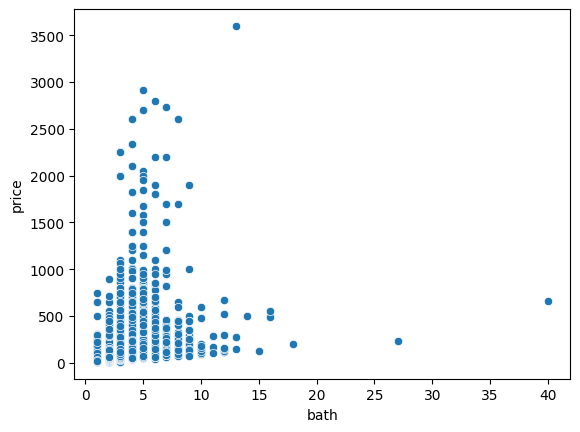

In [45]:
sns.scatterplot(data['bath'],data['price'])

In [46]:
data['location'].value_counts()

Whitefield                                            540
Sarjapur  Road                                        400
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

In [47]:
data['location']= data['location'].apply(lambda x:x.strip())
location_count = data['location'].value_counts()

In [48]:
location_count

Whitefield                                            541
Sarjapur  Road                                        400
Electronic City                                       304
Kanakpura Road                                        273
Thanisandra                                           237
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

In [49]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

Dairy Circle                                          10
Nagappa Reddy Layout                                  10
Basapura                                              10
1st Block Koramangala                                 10
Sector 1 HSR Layout                                   10
Gunjur Palya                                          10
Naganathapura                                         10
BTM 1st Stage                                         10
Nagadevanahalli                                       10
Dodsworth Layout                                      10
Sadashiva Nagar                                       10
Ganga Nagar                                           10
Kalkere                                               10
Vishwanatha Nagenahalli                                9
Chennammana Kere                                       9
2nd Phase JP Nagar                                     9
Jakkur Plantation                                      9
B Narayanapura                 

In [50]:
data['location'] = data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [51]:
data['location'].value_counts()

other                          2885
Whitefield                      541
Sarjapur  Road                  400
Electronic City                 304
Kanakpura Road                  273
Thanisandra                     237
Yelahanka                       213
Uttarahalli                     186
Hebbal                          177
Marathahalli                    175
Raja Rajeshwari Nagar           171
Bannerghatta Road               152
Hennur Road                     152
7th Phase JP Nagar              149
Haralur Road                    142
Electronic City Phase II        132
Rajaji Nagar                    107
Chandapura                      100
Bellandur                        96
KR Puram                         91
Electronics City Phase 1         88
Hoodi                            88
Yeshwanthpur                     85
Begur Road                       84
Sarjapur                         82
Kasavanhalli                     80
Harlur                           79
Banashankari                

# Outlier detection and removal

In [52]:
# Histogram , Q-Q plot, Boxplot

def diagnostic_plots(data, variable):
    
    plt.figure(figsize=(16,4))
    
    # Histogram
    plt.subplot(1,3,1)
    sns.distplot(data[variable], bins=30)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(data[variable],dist="norm",plot=plt)
    plt.ylabel("Variable quantiles")
    
    # Box plot
    plt.subplot(1,3,3)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')
    
    plt.show()

*********************** bath *************************


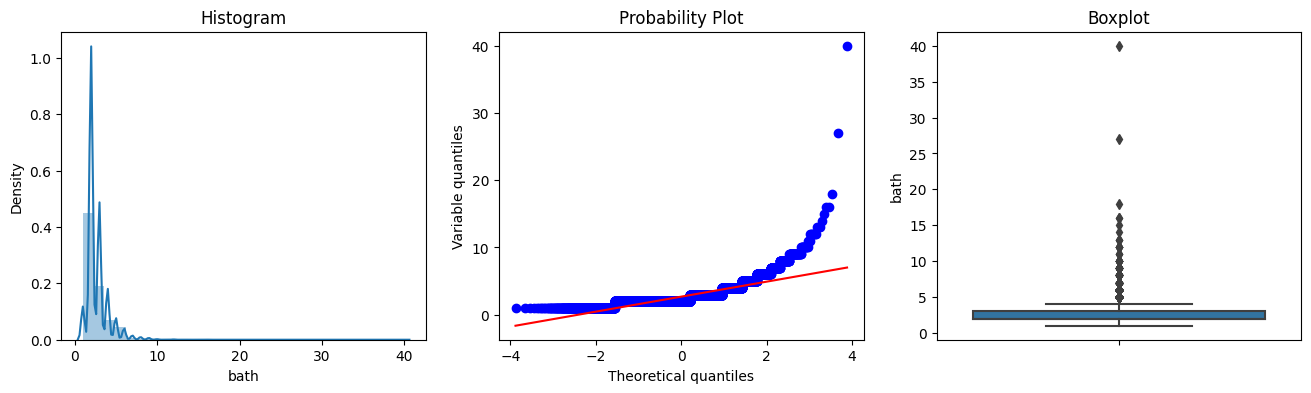

*********************** total_sqft *************************


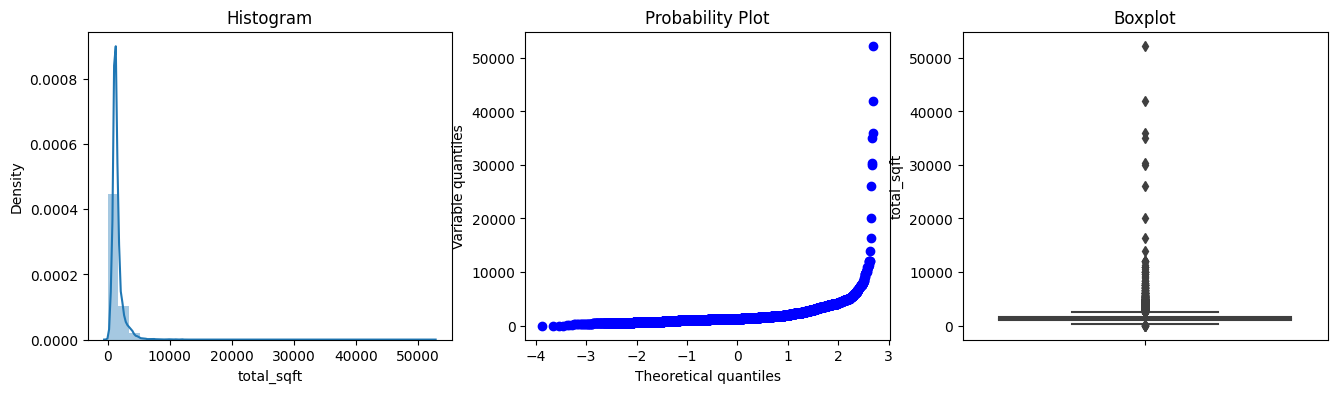

*********************** price *************************


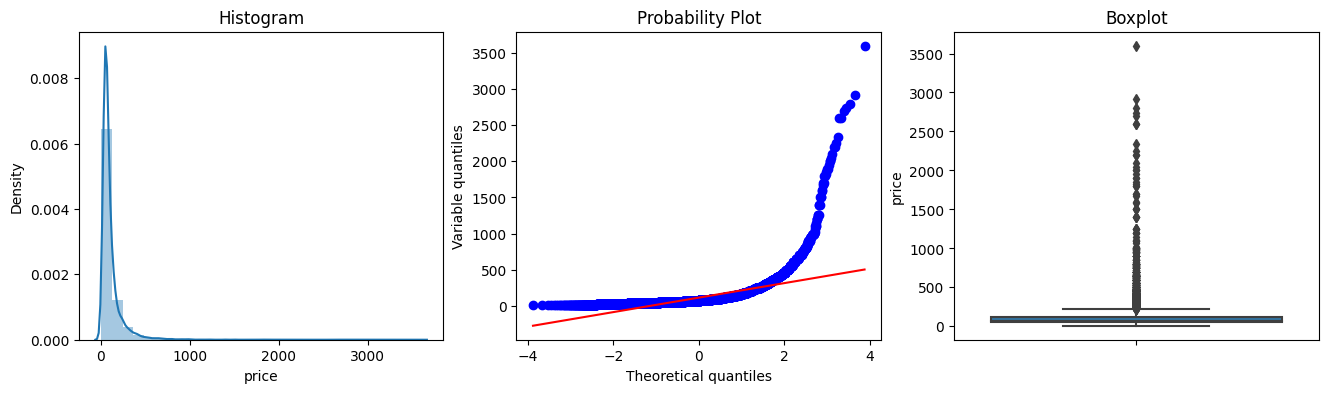

*********************** bhk *************************


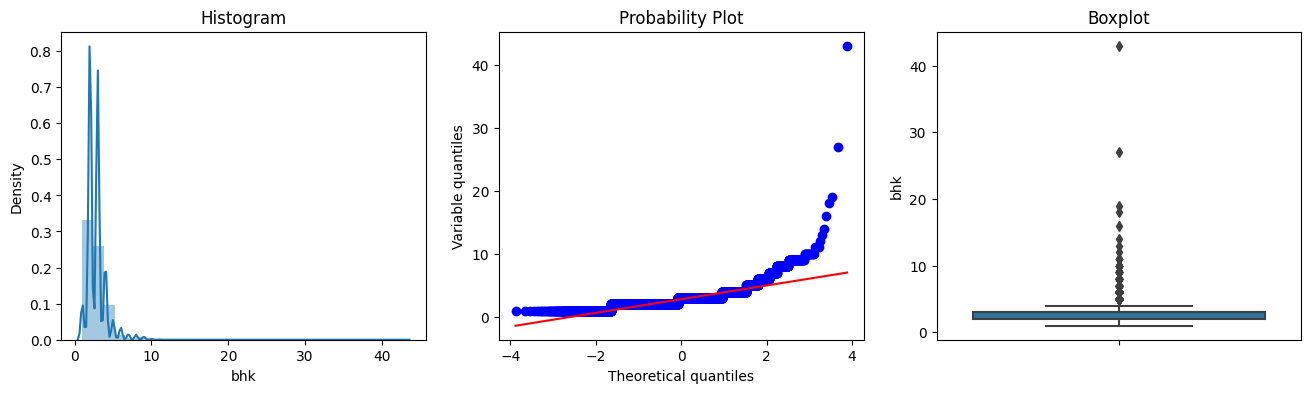

In [53]:
num_var = ["bath","total_sqft","price","bhk"]

for var in num_var:
    print("*********************** {} *************************".format(var))
    diagnostic_plots(data,var)

In [54]:
data.describe()

total_sqft          bath         price           bhk  price_per_sqft
count  13274.000000  13320.000000  13320.000000  13320.000000    1.327400e+04
mean    1559.626694      2.688814    112.565627      2.802778    7.907501e+03
std     1238.405258      1.338754    148.971674      1.294496    1.064296e+05
min        1.000000      1.000000      8.000000      1.000000    2.678298e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.266865e+03
50%     1276.000000      2.000000     72.000000      3.000000    5.434306e+03
75%     1680.000000      3.000000    120.000000      3.000000    7.311746e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07

In [55]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [56]:
data.shape

(13320, 7)

In [57]:
data = data[((data['total_sqft']/data['bhk']) >= 300)]
data.describe()

total_sqft          bath         price           bhk  price_per_sqft
count  12530.000000  12530.000000  12530.000000  12530.000000    12530.000000
mean    1594.564544      2.559537    111.382401      2.650838     6303.979357
std     1261.271296      1.077938    152.077329      0.976678     4162.237981
min      300.000000      1.000000      8.440000      1.000000      267.829813
25%     1116.000000      2.000000     49.000000      2.000000     4210.526316
50%     1300.000000      2.000000     70.000000      3.000000     5294.117647
75%     1700.000000      3.000000    115.000000      3.000000     6916.666667
max    52272.000000     16.000000   3600.000000     16.000000   176470.588235

In [58]:
data.shape

(12530, 7)

In [59]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [60]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        
        st = np.std(subdf.price_per_sqft)
        
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
data = remove_outliers_sqft(data)
data.describe()
    

total_sqft          bath         price           bhk  price_per_sqft
count  10301.000000  10301.000000  10301.000000  10301.000000    10301.000000
mean    1508.440608      2.471702     91.286372      2.574896     5659.062876
std      880.694214      0.979449     86.342786      0.897649     2265.774749
min      300.000000      1.000000     10.000000      1.000000     1250.000000
25%     1110.000000      2.000000     49.000000      2.000000     4244.897959
50%     1286.000000      2.000000     67.000000      2.000000     5175.600739
75%     1650.000000      3.000000    100.000000      3.000000     6428.571429
max    30400.000000     16.000000   2200.000000     16.000000    24509.803922

In [61]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [62]:
data = bhk_outlier_remover(data)

In [63]:
data.shape

(7360, 7)

In [64]:
data

location        size  total_sqft  bath     price  \
0              1st Block Jayanagar       4 BHK    2850.000   4.0   428.000   
1              1st Block Jayanagar       3 BHK    1630.000   3.0   194.000   
2              1st Block Jayanagar       3 BHK    1875.000   2.0   235.000   
3              1st Block Jayanagar       3 BHK    1200.000   2.0   130.000   
4              1st Block Jayanagar       2 BHK    1235.000   2.0   148.000   
5              1st Block Jayanagar       4 BHK    2750.000   4.0   413.000   
6              1st Block Jayanagar       4 BHK    2450.000   4.0   368.000   
8               1st Phase JP Nagar       3 BHK    1875.000   3.0   167.000   
9               1st Phase JP Nagar   5 Bedroom    1500.000   5.0    85.000   
10              1st Phase JP Nagar       3 BHK    2065.000   4.0   210.000   
12              1st Phase JP Nagar       3 BHK    2059.000   3.0   225.000   
13              1st Phase JP Nagar       2 BHK    1394.000   2.0   100.000   
14              1st Phase JP Nagar       2 BHK    1077.000   2.0    93.000   
15              1st Phase JP Nagar   2 Bedroom    1566.000   2.0   180.000   
16              1st Phase JP Nagar       1 BHK     840.000   2.0    50.000   
17              1st Phase JP Nagar       3 BHK    1590.000   3.0   131.000   
18              1st Phase JP Nagar       3 BHK    2180.000   3.0   210.000   
19              1st Phase JP Nagar       2 BHK    1180.000   2.0    88.500   
20              1st Phase JP Nagar       2 BHK    1200.000   2.0    86.000   
21              1st Phase JP Nagar       2 BHK    1394.000   2.0    85.000   
22              1st Phase JP Nagar       3 BHK    2077.000   3.0   175.000   
24              1st Phase JP Nagar       2 BHK    1205.000   2.0    85.000   
26              1st Phase JP Nagar       2 BHK     900.000   2.0    75.000   
27       2nd Phase Judicial Layout       3 BHK    1450.000   2.0    50.750   
28       2nd Phase Judicial Layout       2 BHK    1150.000   2.0    40.250   
29       2nd Phase Judicial Layout       3 BHK    1350.000   2.0    47.250   
30       2nd Phase Judicial Layout       3 BHK    1350.000   2.0    47.250   
31       2nd Phase Judicial Layout       2 BHK     900.000   2.0    41.000   
32       2nd Phase Judicial Layout       3 BHK    1681.000   3.0    69.000   
33       2nd Phase Judicial Layout       3 BHK    1350.000   2.0    47.250   
34       2nd Phase Judicial Layout       2 BHK    1150.000   2.0    40.250   
35            2nd Stage Nagarbhavi   4 Bedroom    1500.000   4.0   220.000   
36            2nd Stage Nagarbhavi   6 Bedroom    3000.000   8.0   451.000   
37            2nd Stage Nagarbhavi   6 Bedroom    2400.000   8.0   450.000   
38            2nd Stage Nagarbhavi   4 Bedroom    1350.000   4.0   200.000   
39            2nd Stage Nagarbhavi   4 Bedroom    1200.000   4.0   225.000   
40            2nd Stage Nagarbhavi   4 Bedroom    1500.000   3.0   230.000   
41            5th Block Hbr Layout       2 BHK    1206.000   2.0    56.000   
42            5th Block Hbr Layout       3 BHK    1270.000   2.0    70.000   
43            5th Block Hbr Layout       2 BHK    1312.000   2.0    69.000   
44            5th Block Hbr Layout       2 BHK    1100.000   2.0    48.000   
45            5th Block Hbr Layout   5 Bedroom    3600.000   5.0   130.000   
46            5th Block Hbr Layout       6 BHK    5100.000   5.0   300.000   
47              5th Phase JP Nagar       2 BHK    1075.000   2.0    60.000   
48              5th Phase JP Nagar       2 BHK    1150.000   3.0    52.500   
49              5th Phase JP Nagar       2 BHK    1256.000   2.0    62.800   
50              5th Phase JP Nagar       2 BHK    1207.000   2.0    63.000   
51              5th Phase JP Nagar       3 BHK    1725.000   2.0   100.000   
52              5th Phase JP Nagar       2 BHK    1440.000   2.0    60.000   
53              5th Phase JP Nagar       3 BHK    1700.000   2.0   100.000   
55              5th Phase JP Nagar       5 BHK  

In [65]:
data.drop(columns=['size','price_per_sqft'],inplace=True)

# Cleaned data

In [66]:
data.head(10)

location  total_sqft  bath  price  bhk
0   1st Block Jayanagar      2850.0   4.0  428.0    4
1   1st Block Jayanagar      1630.0   3.0  194.0    3
2   1st Block Jayanagar      1875.0   2.0  235.0    3
3   1st Block Jayanagar      1200.0   2.0  130.0    3
4   1st Block Jayanagar      1235.0   2.0  148.0    2
5   1st Block Jayanagar      2750.0   4.0  413.0    4
6   1st Block Jayanagar      2450.0   4.0  368.0    4
8    1st Phase JP Nagar      1875.0   3.0  167.0    3
9    1st Phase JP Nagar      1500.0   5.0   85.0    5
10   1st Phase JP Nagar      2065.0   4.0  210.0    3

In [67]:
data.to_csv("Cleaned_data.csv")

In [68]:
X = data.drop(columns=['price'])
y = data['price']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler 
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [71]:
print(X_train.shape)

(5888, 4)


In [72]:
print(X_test.shape)

(1472, 4)


# Applying Linear Regression

In [73]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [74]:
scaler = StandardScaler()

In [75]:
lr = LinearRegression(normalize=True)

In [76]:
pipe = make_pipeline(column_trans,scaler,lr)

In [77]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [78]:
y_pred_lr = pipe.predict(X_test)

In [79]:
r2_score(y_test,y_pred_lr)

0.8296416495223775

Applying Lasso

In [80]:
lasso = Lasso()

In [81]:
pipe = make_pipeline(column_trans,scaler,lasso)

In [82]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [83]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.8199181874762704

Applying Ridge

In [84]:
ridge = Ridge()

In [85]:
pipe = make_pipeline(column_trans,scaler,ridge)

In [86]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [87]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8296651410179635

In [88]:
print("No Regularization: ",r2_score(y_test,y_pred_lr))
print("Lasso: ",r2_score(y_test,y_pred_lasso))
print("Ridge: ",r2_score(y_test,y_pred_ridge))

No Regularization:  0.8296416495223775
Lasso:  0.8199181874762704
Ridge:  0.8296651410179635


In [89]:
import pickle

In [90]:
pickle.dump(pipe,open('RidgeModel.pkl','wb'))